In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv(r"G:\ProdigyInfotech\Prodigy_Task_4\twitter_training.csv")
Val_data = pd.read_csv(r"G:\ProdigyInfotech\Prodigy_Task_4\twitter_validation.csv")

In [7]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
Val_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
train_data.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [13]:
Val_data.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [15]:
train_data.duplicated().sum()

2700

In [17]:
Val_data.duplicated().sum()

0

In [19]:
sentiment_dis_train = train_data.iloc[:, 2].value_counts()
sentiment_dis_val = Val_data.iloc[:, 2].value_counts()

In [23]:
unique_entities_train = train_data.iloc[:, 1].nunique()
sentiment_dis_train,sentiment_dis_val, unique_entities_train

(Positive
 Negative      22542
 Positive      20831
 Neutral       18318
 Irrelevant    12990
 Name: count, dtype: int64,
 Irrelevant
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: count, dtype: int64,
 32)

In [25]:
clean_traindata = train_data.drop_duplicates()
clean_traindata = clean_traindata.dropna(subset=[train_data.columns[3]])
remaining_duplicates_train = clean_traindata.duplicated().sum()
remaining_missing_train = clean_traindata.isnull().sum()
remaining_duplicates_train, remaining_missing_train

(0,
 2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64)

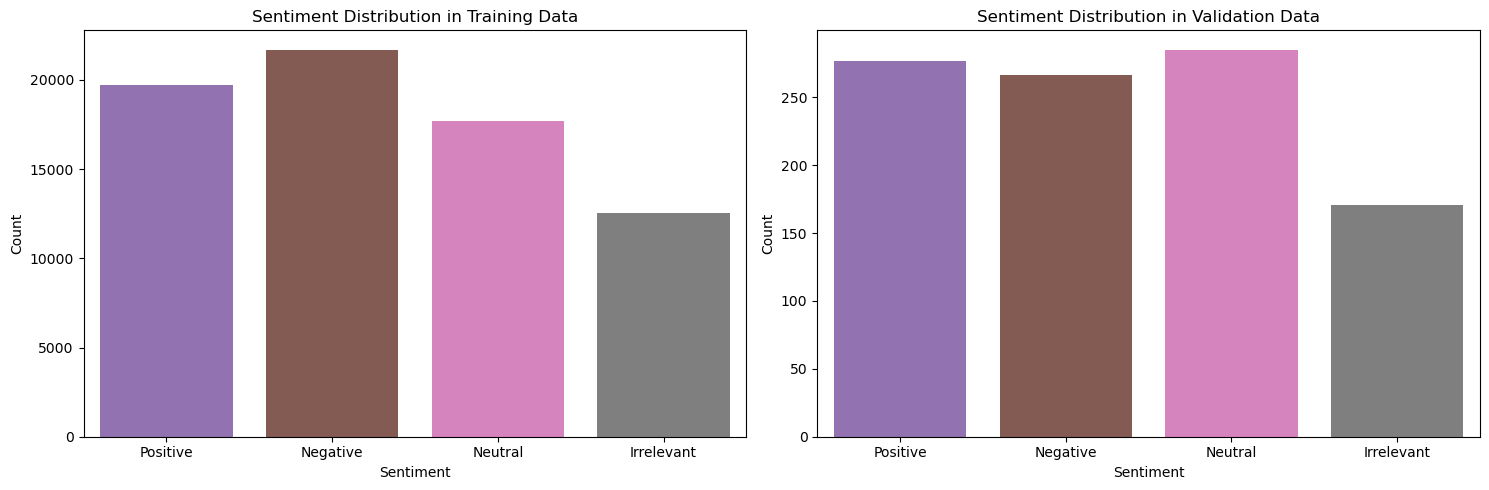

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
palette_comb = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
sentiment_order = ['Positive', 'Negative', 'Neutral', 'Irrelevant']
sns.countplot(data=clean_traindata, x=clean_traindata.columns[2], hue=clean_traindata.columns[2], 
              order=sentiment_order, hue_order=sentiment_order, palette=palette_comb, ax=ax[0], legend=False)
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')
sns.countplot(data=Val_data, x=Val_data.columns[2], hue=Val_data.columns[2], 
              order=sentiment_order, hue_order=sentiment_order, palette=palette_comb, ax=ax[1], legend=False)
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()


<Axes: xlabel='count', ylabel='Borderlands'>

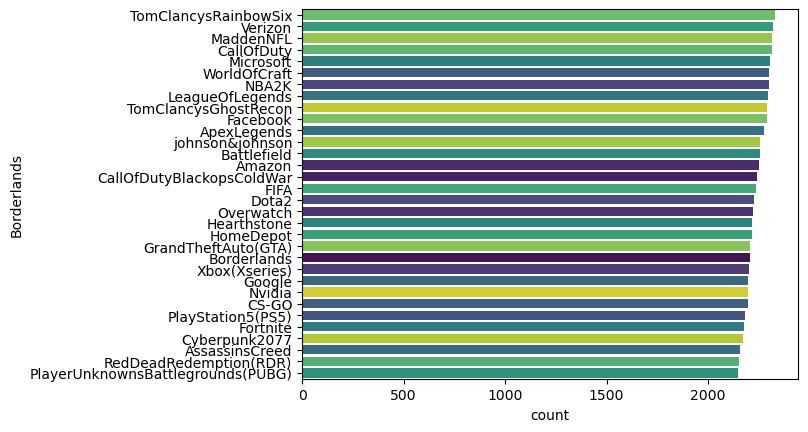

In [53]:
sns.countplot(data=clean_traindata, y=clean_traindata.columns[1], 
              hue=clean_traindata.columns[1], 
              order=clean_traindata[clean_traindata.columns[1]].value_counts().index, 
              palette='viridis', legend=False)


In [55]:
clean_traindata['message_length'] = clean_traindata[clean_traindata.columns[3]].apply(len)
Val_data['message_length'] = Val_data[Val_data.columns[3]].apply(len)

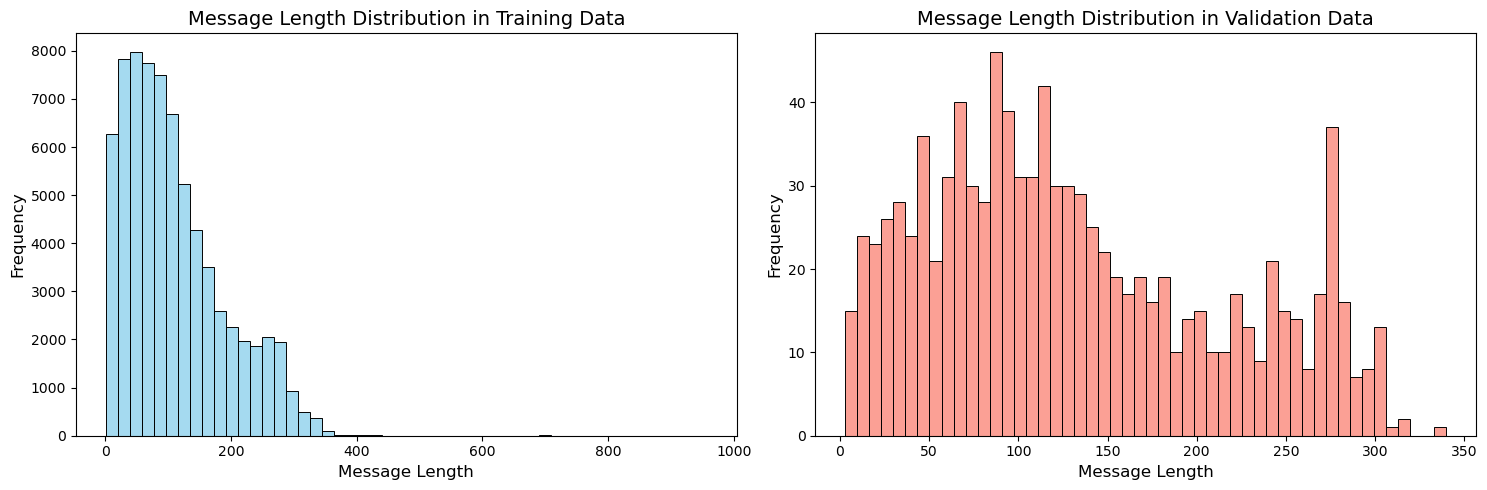

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(clean_traindata['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_xlabel('Message Length', fontsize=12)
sns.histplot(Val_data['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_xlabel('Message Length', fontsize=12)
plt.tight_layout()
plt.show()


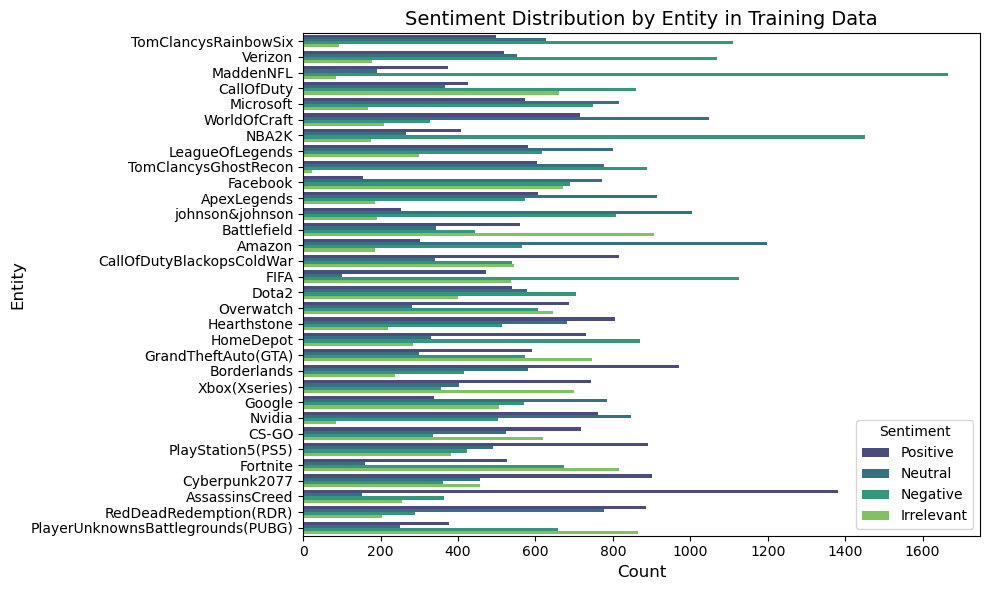

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=clean_traindata, 
    y=clean_traindata.columns[1], 
    hue=clean_traindata.columns[2], 
    order=clean_traindata[clean_traindata.columns[1]].value_counts().index, 
    palette='viridis'
)
plt.title('Sentiment Distribution by Entity in Training Data', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Entity', fontsize=12)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


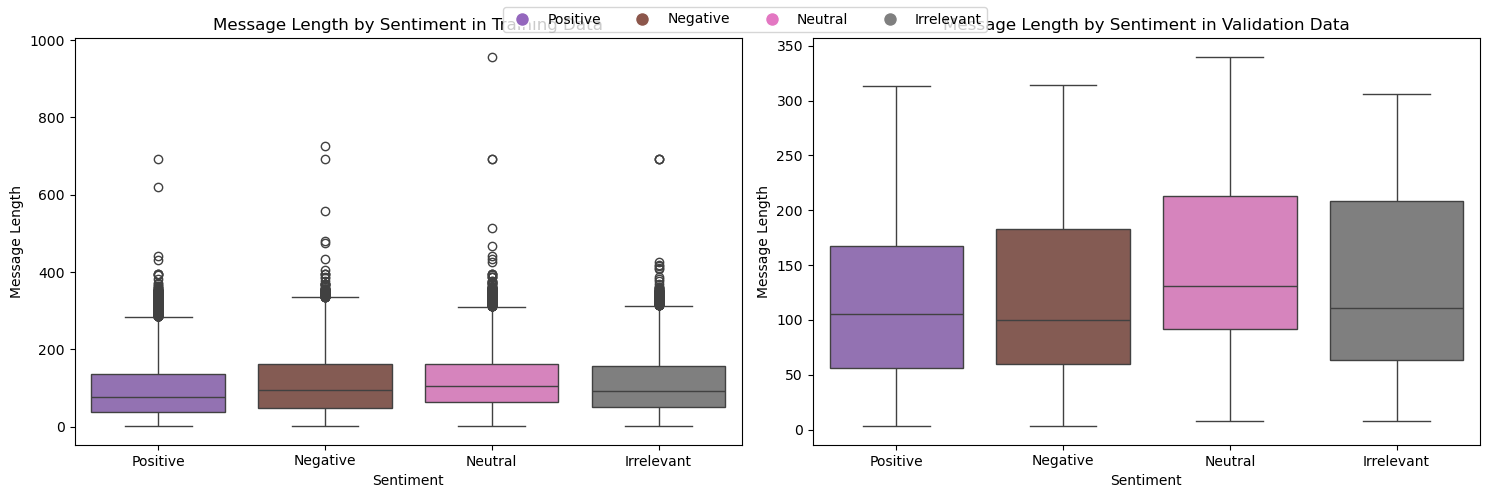

In [79]:
color_mapping = {
    'Positive': '#9467bd',  # Purple
    'Negative': '#8c564b',  # Brown
    'Neutral': '#e377c2',   # Pink
    'Irrelevant': '#7f7f7f' # Gray
}
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(
    data=clean_traindata, 
    x=clean_traindata.columns[2], 
    y='message_length', 
    ax=ax[0], 
    hue=clean_traindata.columns[2], 
    palette=color_mapping, 
    order=['Positive', 'Negative', 'Neutral', 'Irrelevant']
)
ax[0].set_title('Message Length by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')

sns.boxplot(
    data=Val_data, 
    x=Val_data.columns[2], 
    y='message_length', 
    ax=ax[1], 
    hue=Val_data.columns[2], 
    palette=color_mapping, 
    order=['Positive', 'Negative', 'Neutral', 'Irrelevant']
)
ax[1].set_title('Message Length by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) for label in ['Positive', 'Negative', 'Neutral', 'Irrelevant']]
fig.legend(handles, ['Positive', 'Negative', 'Neutral', 'Irrelevant'], loc='upper center', ncol=4)

plt.tight_layout()
plt.show()
